Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.67      0.40      0.50      1598

    accuracy                           0.91     13564
   macro avg       0.80      0.69      0.72     13564
weighted avg       0.89      0.91      0.90     13564

Confusion Matrix:
[[11653   313]
 [  963   635]]


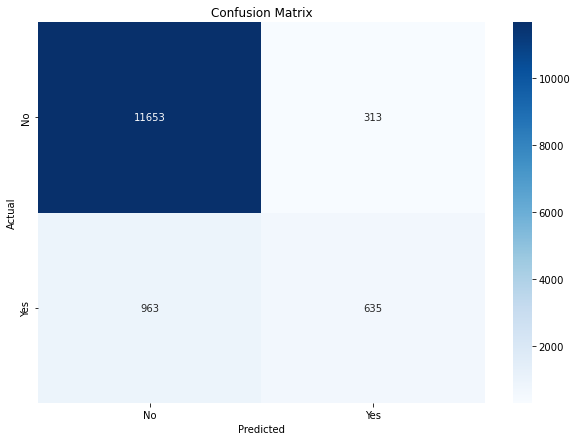

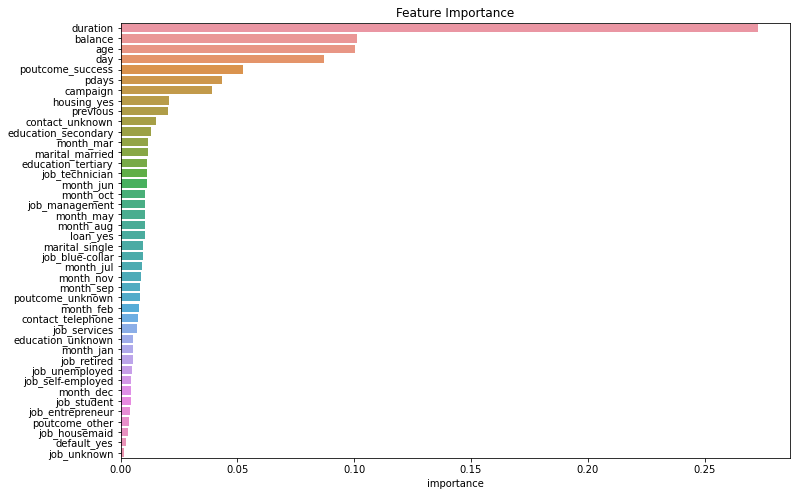

In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/shell/Downloads/bank-full.csv', delimiter=';')
df = pd.get_dummies(df, drop_first=True)
X = df.drop('y_yes', axis=1)
y = df['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
feature_importances = pd.DataFrame(rf_clf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importance')
plt.show()
